#<center>Análise Exploratória<center>#

In [ ]:
import pandas as pd

dados = pd.read_csv('churn.csv')
dados

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Números de mulheres e homens 

dados["Gender"].value_counts

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
dados.groupby(['Gender']).mean().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,
Female,4942.93,15691148.79,650.83,39.24,4.97,75659.37,1.54,0.70,0.50,100601.54,0.25
Male,5048.43,15690767.22,650.28,38.66,5.05,77173.97,1.52,0.71,0.53,99664.58,0.16


In [ ]:
# Números de pessoas que continuam (0) e que deixaram de ser clientes do banco (1)

dados["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# Número de mulheres que deixaram de ser clientes do banco

dados[(dados["Gender"] == 'Female') & (dados["Exited"] == 1)].value_counts()

RowNumber  CustomerId  Surname    CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave   619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6413       15598982    Klein      602          Germany    Female  53   5       98268.84   1              0          1               45038.29         1         1
6496       15640852    McGregor   617          Germany    Female  39   5       83348.89   3              1          0               7953.62          1         1
6473       15588419    Johnston   651          Germany    Female  34   10      148962.46  1              1          0               66389.43         1         1
6468       15641782    Humphries  540          France     Female  31   7       0.00       1              0          1               183051.60        1         1
                                       

In [ ]:
# Número de pessoas com pontuação de crédito abaixo de 500

filtro = dados.loc[(dados['CreditScore'] < 500) & (dados["Exited"] == 1)].filter(items = ['Gender', 'Age', 'CreditScore', 'Tenure', 'NumOfProducts','EstimatedSalary', 'Exited'])
filtro

,Gender,Age,CreditScore,Tenure,NumOfProducts,EstimatedSalary,Exited
7,Female,29,376,4,4,119346.88,1
35,Female,45,475,0,1,27822.99,1
41,Female,51,465,8,1,181297.65,1
109,Male,35,479,9,1,99449.86,1
125,Male,42,432,9,1,110265.24,1
...,...,...,...,...,...,...,...
9624,Female,40,350,0,1,172321.21,1
9652,Female,40,480,7,1,170332.67,1
9825,Male,28,467,10,1,32349.29,1
9879,Male,62,486,9,2,168034.83,1


In [ ]:
# Número de mulheres que continuam clientes do banco

dados[(dados["Gender"] == 'Female') & (dados["Exited"] == 0)].value_counts()

RowNumber  CustomerId  Surname   CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
2          15647311    Hill      608          Spain      Female  41   1       83807.86   1              0          1               112542.58        0         1
6626       15610912    Ferri     657          Spain      Female  41   6       112119.48  1              1          0               17536.82         0         1
6635       15575399    Somadina  480          France     Female  42   1       152160.21  2              1          0               101778.90        0         1
6636       15678374    Colombo   666          France     Female  59   5       0.00       2              1          1               185123.09        0         1
6642       15591942    Zito      611          Spain      Female  33   7       0.00       2              1          1               3729.89          0         1
                                             

In [ ]:
# Número de pessoas na Espanha que deixaram de ser clientes

dados[(dados["Geography"] == 'Spain') & (dados["Exited"] == 1)].value_counts()

RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
6          15574012    Chu         645          Spain      Male    44   8       113755.78  2              1          0               149756.71        1         1
6316       15687421    Highland    559          Spain      Male    67   9       125919.35  1              1          0               175910.95        1         1
6480       15704160    Wan         648          Spain      Male    49   5       0.00       1              1          0               149946.43        1         1
6440       15583371    Artemiev    632          Spain      Male    37   1       138207.08  1              1          0               60778.11         1         1
6405       15745399    Marino      649          Spain      Female  49   2       0.00       1              1          0               84863.85         1         1
                                 

In [ ]:
# Número de pessoas na Germânia que deixaram de ser clientes

dados[(dados["Geography"] == 'Germany') & (dados["Exited"] == 1)].value_counts()

RowNumber  CustomerId  Surname    CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
8          15656148    Obinna     376          Germany    Female  29   4       115046.74  4              1          0               119346.88        1         1
6858       15629299    Yang       546          Germany    Female  52   1       106074.89  1              1          1               23548.45         1         1
6704       15583863    Chimaobim  681          Germany    Male    49   8       142946.18  1              0          0               187280.51        1         1
6705       15681878    Fan        436          Germany    Male    45   3       104339.11  2              1          1               183540.22        1         1
6708       15735909    McDonald   607          Germany    Female  39   8       105103.33  1              1          0               104721.50        1         1
                                       

In [ ]:
# Número de pessoas na França que deixaram de ser clientes

dados[(dados["Geography"] == 'France') & (dados["Exited"] == 1)].value_counts()

RowNumber  CustomerId  Surname      CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave     619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6539       15604093    Neitenstein  546          France     Male    34   4       165363.31  2              1          1               25744.13         1         1
6299       15755241    Rahman       714          France     Female  52   2       0.00       1              0          1               144045.08        1         1
6315       15790810    Han          844          France     Female  41   10      76319.64   1              1          1               141175.18        1         1
6377       15640686    Greco        700          France     Male    46   5       95872.86   1              1          0               98273.01         1         1
                           

In [ ]:
# Dados em relação ao sexo feminino

filtro_mulheres = dados.loc[dados['Gender'] == 'Female'].filter(items = ['Gender', 'Age', 'CreditScore', 'Geography', 'Tenure', 'NumOfProducts','EstimatedSalary', 'Exited'])
filtro_mulheres

,Gender,Age,CreditScore,Geography,Tenure,NumOfProducts,EstimatedSalary,Exited
0,Female,42,619,France,2,1,101348.88,1
1,Female,41,608,Spain,1,1,112542.58,0
2,Female,42,502,France,8,3,113931.57,1
3,Female,39,699,France,1,2,93826.63,0
4,Female,43,850,Spain,2,1,79084.10,0
...,...,...,...,...,...,...,...,...
9982,Female,46,655,Germany,7,1,115146.40,1
9991,Female,53,597,France,4,1,69384.71,1
9994,Female,29,800,France,2,2,167773.55,0
9997,Female,36,709,France,7,1,42085.58,1


In [ ]:
# Análise de extremos quanto ao público feminino

numero_mulheres = filtro_mulheres['Gender'].count()
print("Quantidade de mulheres: ", numero_mulheres)

maior_pont_credito_fem = filtro_mulheres['CreditScore'].max()
print('\nMaior pontuação de crédito: ', maior_pont_credito_fem)

menor_pont_credito_fem = filtro_mulheres['CreditScore'].min()
print('Menor pontuação de crédito: ', menor_pont_credito_fem)

maior_indic_estabilidade_emprego_fem = filtro_mulheres['Tenure'].max()
print('Maior indicativo de estabilidade no emprego: ', maior_indic_estabilidade_emprego_fem)

menor_indic_estabilidade_emprego_fem = filtro_mulheres['Tenure'].min()
print('Menor indicativo de estabilidade no emprego: ', menor_indic_estabilidade_emprego_fem)

maior_numero_produtos_fem = filtro_mulheres['NumOfProducts'].max()
print('Maior número de produtos: ', maior_numero_produtos_fem)

menor_numero_produtos_fem = filtro_mulheres['NumOfProducts'].min()
print('Menor número de produtos: ', menor_numero_produtos_fem)

maior_salario_estimado_fem = filtro_mulheres['EstimatedSalary'].max()
print('Maior salário estimado: ', maior_salario_estimado_fem)

menor_salario_estimado_fem = filtro_mulheres['EstimatedSalary'].min()
print('Menor salário estimado: ', menor_salario_estimado_fem)

Quantidade de mulheres:  4543

Maior pontuação de crédito:  850
Menor pontuação de crédito:  350
Maior indicativo de estabilidade no emprego:  10
Menor indicativo de estabilidade no emprego:  0
Maior número de produtos:  4
Menor número de produtos:  1
Maior salário estimado:  199992.48
Menor salário estimado:  91.75


In [ ]:
# Dados em relação ao sexo masculino

filtro_homens = dados.loc[dados['Gender'] == 'Male'].filter(items = ['Gender', 'Age', 'CreditScore', 'Geography', 'Tenure', 'NumOfProducts','EstimatedSalary', 'Exited'])
filtro_homens

,Gender,Age,CreditScore,Geography,Tenure,NumOfProducts,EstimatedSalary,Exited
5,Male,44,645,Spain,8,2,149756.71,1
6,Male,50,822,France,7,2,10062.80,0
8,Male,44,501,France,4,2,74940.50,0
9,Male,27,684,France,2,1,71725.73,0
10,Male,31,528,France,6,2,80181.12,0
...,...,...,...,...,...,...,...,...
9992,Male,36,726,Spain,2,1,195192.40,0
9993,Male,28,644,France,7,1,29179.52,0
9995,Male,39,771,France,5,2,96270.64,0
9996,Male,35,516,France,10,1,101699.77,0


In [ ]:
# Análise de extremos quanto ao público masculino

numero_homens = filtro_homens['Gender'].count()
print("Quantidade de homens: ", numero_homens)

maior_pont_credito_masc = filtro_homens['CreditScore'].max()
print('\nMaior pontuação de crédito: ', maior_pont_credito_masc)

menor_pont_credito_masc = filtro_homens['CreditScore'].min()
print('Menor pontuação de crédito: ', menor_pont_credito_masc)

maior_indic_estabilidade_emprego_masc = filtro_homens['Tenure'].max()
print('Maior indicativo de estabilidade no emprego: ', maior_indic_estabilidade_emprego_masc)

menor_indic_estabilidade_emprego_masc = filtro_homens['Tenure'].min()
print('Menor indicativo de estabilidade no emprego: ', menor_indic_estabilidade_emprego_masc)

maior_numero_produtos_masc = filtro_homens['NumOfProducts'].max()
print('Maior número de produtos: ', maior_numero_produtos_masc)

menor_numero_produtos_masc = filtro_homens['NumOfProducts'].min()
print('Menor número de produtos: ', menor_numero_produtos_masc)

maior_salario_estimado_masc = filtro_homens['EstimatedSalary'].max()
print('Maior salário estimado: ', maior_salario_estimado_masc)

menor_salario_estimado_masc = filtro_homens['EstimatedSalary'].min()
print('Menor salário estimado: ', menor_salario_estimado_masc)

Quantidade de homens:  5457

Maior pontuação de crédito:  850
Menor pontuação de crédito:  350
Maior indicativo de estabilidade no emprego:  10
Menor indicativo de estabilidade no emprego:  0
Maior número de produtos:  4
Menor número de produtos:  1
Maior salário estimado:  199953.33
Menor salário estimado:  11.58


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

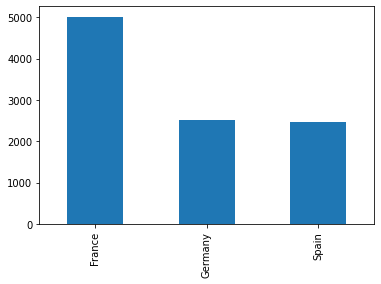

In [ ]:
# Localidades dos clientes

dados["Geography"].value_counts(normalize = False).plot(kind = 'bar')

dados["Geography"].value_counts()

In [ ]:
# Número de mulheres que abriram conta na França

dados[(dados["Gender"] == 'Female') & (dados["Geography"] == 'France')].value_counts()

RowNumber  CustomerId  Surname   CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave  619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6665       15667632    Birdseye  703          France     Female  42   7       0.00       2              0          1               72500.68         0         1
6643       15724924    Giordano  589          France     Female  37   6       138497.84  1              0          1               18988.58         0         1
6648       15691627    Tai       713          France     Female  37   8       0.00       1              1          1               16403.41         0         1
6649       15731751    Osinachi  437          France     Female  26   1       120923.52  1              0          1               78854.57         0         1
                                             

In [ ]:
# Número de mulheres que abriram conta na Germânia

dados[(dados["Gender"] == 'Female') & (dados["Geography"] == 'Germany')].value_counts()

RowNumber  CustomerId  Surname    CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
8          15656148    Obinna     376          Germany    Female  29   4       115046.74  4              1          0               119346.88        1         1
6811       15642996    Tsai       546          Germany    Female  42   9       86351.85   2              1          0               57380.13         0         1
6785       15570912    Ogbonnaya  728          Germany    Female  32   9       127772.10  2              1          1               152643.48        0         1
6779       15613463    Hackett    679          Germany    Female  50   6       132598.38  2              1          1               184017.98        0         1
6767       15593510    Capon      638          Germany    Female  33   5       129335.65  1              1          1               56585.20         1         1
                                       

In [ ]:
# Número de mulheres que abriram conta na Espanha

dados[(dados["Gender"] == 'Female') & (dados["Geography"] == 'Spain')].value_counts()

RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
2          15647311    Hill        608          Spain      Female  41   1       83807.86   1              0          1               112542.58        0         1
6338       15618243    Buckland    730          Spain      Female  43   1       103960.38  1              1          1               193650.16        0         1
6387       15584090    Jen         621          Spain      Female  40   7       0.00       2              0          1               131283.60        1         1
6376       15708534    Afamefuna   524          Spain      Female  64   5       0.00       1              1          0               136079.64        1         1
6366       15576196    Benson      743          Spain      Female  48   5       118207.69  2              0          0               186489.14        1         1
                                 

Pode-se concluir que o banco possui um público maior de homens do que de mulheres:

*   5457 Homens
*   4543 Mulheres

O público feminino possui uma idade média de 39 anos.

O público masculino possui uma idade média de 38 anos.


Dado o exposto, dentre as 10.000 contas constatadas, pode-se concluir que:

*   5014 são contas que foram criadas na França:
  *   2261 são contas pertencentes ao público feminino
  *   2753 são contas pertencentes ao público masculino

*   2509 são contas que foram criadas na Germânia:
  *   1193 são contas pertencentes ao público feminino
  *   1316 são contas pertencentes ao público masculino

*   2477 são contas que foram criadas na Espanha:
  *   1089 são contas pertencentes ao público feminino
  *   1388 são contas pertencentes ao público masculino

*   7963 pessoas continuam como clientes do banco:
  *   3404 dessas pessoas são mulheres
  *   4559 dessas pessoas são homens

*   2037 pessoas deixaram de ser clientes do banco:
  *   413 dessas pessoas são da Espanha;
  *   814 dessas pessoas são da Germânia;
  *   810 dessas pessoas são da França;
  *   150 dessas pessoas possuem uma pontuação de crédito abaixo de 500 pontos;
  *   1139 dessas pessoas são mulheres;
  *   898 dessas pessoas são homens.
